<a href="https://colab.research.google.com/github/MiskirB/B5W10_brent-oil-change-point-analysis/blob/task-1-eda/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving BrentOilPrices.csv to BrentOilPrices.csv
Saving event_data.csv to event_data.csv


In [3]:
!pip install pymc3==3.11.5 arviz==0.11.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 29.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of pymc3 to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=3.7,<3.11; 1.7.3 Requires-Python >=3.7,<3.11; 1.8.0 Requires-Python >=3.8,<3.11; 1.8.0rc1 Requires-Python >=3.8,<3.11; 1.8.0rc2 Requires-Python >=3.8,<3.11

In [4]:
!pip install pymc arviz pytensor


In [5]:
# 📦 Install libraries
!pip install pymc3==3.11.5 arviz==0.11.2

# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm  # instead of pymc3
import pytensor.tensor as pt  # instead of theano.tensor


# Plot settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)


  Using cached pymc3-3.11.5-py3-none-any.whl.metadata (14 kB)
  Using cached arviz-0.11.2-py3-none-any.whl.metadata (8.1 kB)
  Using cached deprecat-2.1.3-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached numpy-1.22.1.zip (11.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of pymc3 to determine which version is compatible with other requirements. This could take a while.
ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11; 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10; 1.7.2 Requires-Python >=

In [12]:
from google.colab import files
uploaded = files.upload()


Saving BrentOilPrices.csv to BrentOilPrices (1).csv
Saving event_data.csv to event_data (1).csv


In [14]:
df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)
df = df.sort_values('Date')
df.head()


/tmp/ipython-input-3024187150.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


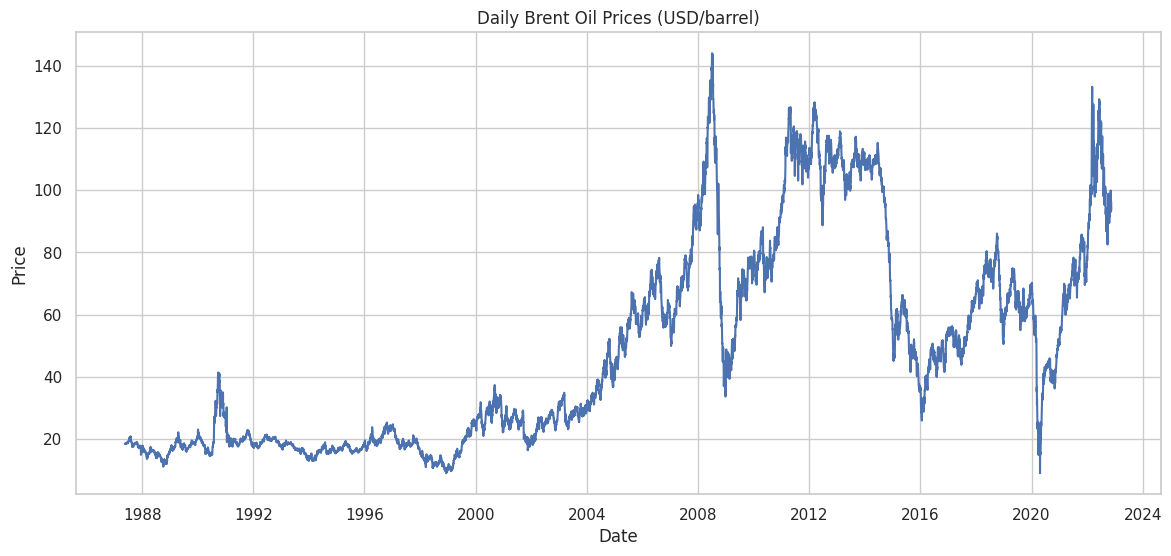

In [15]:
# Plot raw prices
plt.plot(df['Date'], df['Price'])
plt.title("Daily Brent Oil Prices (USD/barrel)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


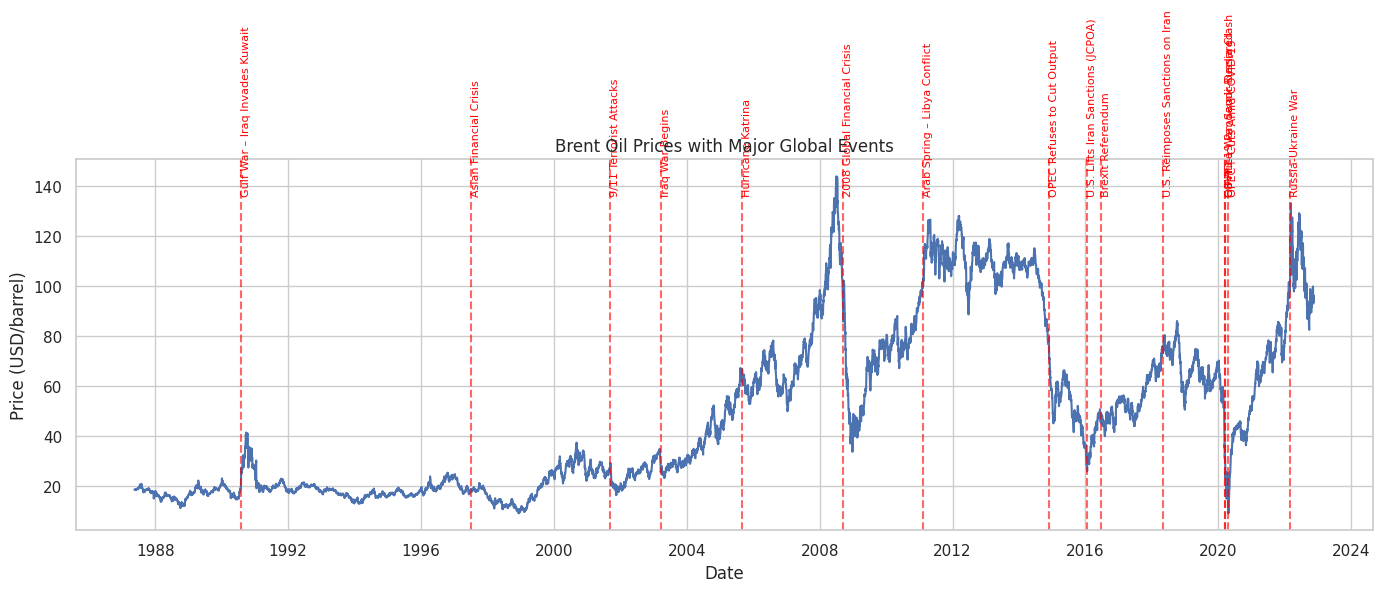

In [16]:
# Load event data
events = pd.read_csv('event_data.csv', parse_dates=['Start Date'])

# Overlay on price chart
plt.plot(df['Date'], df['Price'], label='Brent Price')
for _, row in events.iterrows():
    plt.axvline(row['Start Date'], color='red', linestyle='--', alpha=0.6)
    plt.text(row['Start Date'], df['Price'].max()*0.95, row['Event Name'], rotation=90, fontsize=8, color='red')

plt.title("Brent Oil Prices with Major Global Events")
plt.xlabel("Date")
plt.ylabel("Price (USD/barrel)")
plt.tight_layout()
plt.show()
